<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/Petrol_Consumption_Multivariable_Linear_Regression_Without_SK_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






**Petrol_Consumption_Multivariable_Linear_Regression_Without_SK-Learn**

In [85]:
# dataset

import os
import io
import pandas as pd
import matplotlib.pyplot as plt # for ploting
import seaborn as sns # for ploting 3D data
%matplotlib inline

df = pd.read_csv('/content/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [86]:
df = df.rename(columns={'Petrol_tax': 'x1', 'Average_income': 'x2', 'Paved_Highways': 'x3', 'Population_Driver_licence(%)': 'x4', 'Petrol_Consumption': 'y'})
df.head()

,x1,x2,x3,x4,y
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [87]:
x1 = df.x1
x2 = df.x2 
x3 = df.x3 
x4 = df.x4  

In [88]:
def predict(t0,t1,t2,t3,t4,x1,x2,x3,x4):
    return t0 + t1 * x1 + t2 * x2 + t3 * x3 + t4 * x4

In [89]:
def computeCost(t0,t1,t2,t3,t4,x1,x2,x3,x4,y):
    # Getting number of data
    m = float(len(y))
    loss = []
    # Iterating over all of the data
    for i in range(len(y)):
        # Getting prediction using the parameter [t0, t1, t2]
        h = predict(t0,t1,t2,t3,t4,x1[i],x2[i],x3[i],x4[i])
        # Adding the losses to the list
        loss.append((h - y[i])**2)

    return (sum(loss) / (2 * m))

In [90]:
def plot_cost_vs_iteration(costs):
    plt.plot([i for i in range(len(costs))], costs)
    plt.title("Cost vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

Cost: 26916934198552.254
Cost: 1.132262734059695e+23
Cost: 4.7644703814077e+32
Cost: 2.0048535651692753e+42
Cost: 8.436274169974911e+51
Cost: 3.5499212066746747e+61
Cost: 1.493780348966222e+71
Cost: 6.285716220298464e+80
Cost: 2.6449824721195764e+90
Cost: 1.1129888834669024e+100
Cost: 4.683374153811403e+109
Cost: 1.9707288896062864e+119
Cost: 8.292680082303806e+128
Cost: 3.4894978862961134e+138
Cost: 1.4683546667197905e+148
Cost: 6.178726847048807e+157
Cost: 2.5999621423702704e+167
Cost: 1.0940446647171884e+177
Cost: 4.603658295212538e+186
Cost: 1.9371850512664206e+196
Cost: 8.151530114110766e+205
Cost: 3.4301030331519023e+215
Cost: 1.4433617558096156e+225
Cost: 6.073558543282272e+234
Cost: 2.5557081050679276e+244
Cost: 1.075422896109941e+254
Cost: 4.52529928274713e+263
Cost: 1.9042121636527054e+273
Cost: 8.012782663960524e+282
Cost: 3.371719141668926e+292


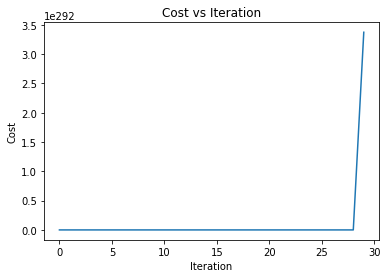

In [91]:
# Parameters to be updated
t0 = 0.0
t1 = 0.0
t2 = 0.0
t3 = 0.0
t4 = 0.0
# x1=[]
# x2=[]
# x3=[]
# x4=[]
# print(x1)
# print(x2)
# print(x3)
# print(x4)
# Data Length
m = float(len(y))

# Epoch [No. of iterations]
epoch = 30

# Learning Rate
alpha = 0.001

# Costs
costs = []

# Batch Gradient Descent
for k in range(epoch):

    _theta_temp_0 = t0 + (alpha / m) * sum([(y[k] - predict(t0,t1,t2,t3,t4,x1[k],x2[k],x3[k],x4[k]))
                                                     for k in range(len(y))
                                                 ])

    _theta_temp_1 = t1 + (alpha / m) * sum([(y[k] - predict(t0,t1,t2,t3,t4,x1[k],x2[k],x3[k],x4[k])) * x1[k]
                                                     for k in range(len(y))
                                                 ])

    _theta_temp_2 = t2 + (alpha / m) * sum([(y[k] - predict(t0,t1,t2,t3,t4,x1[k],x2[k],x3[k],x4[k])) * x2[k]
                                                     for k in range(len(y))
                                                 ])

    _theta_temp_3 = t3 + (alpha / m) * sum([(y[k] - predict(t0,t1,t2,t3,t4,x1[k],x2[k],x3[k],x4[k])) * x3[k]
                                                     for k in range(len(y))
                                                 ])     

    _theta_temp_4 = t4 + (alpha / m) * sum([(y[k] - predict(t0,t1,t2,t3,t4,x1[k],x2[k],x3[k],x4[k])) * x4[k]
                                                     for k in range(len(y))
                                                 ])       



    t0 = _theta_temp_0
    t1 = _theta_temp_1
    t2 = _theta_temp_2
    t3 = _theta_temp_3
    t4 = _theta_temp_4

    # Calculating cost
    cost = computeCost(t0,t1,t2,t3,t4,x1,x2,x3,x4, y)

    # Saving it to the list for future use
    costs.append(cost)

    # Printing cost after each epoch
    print("Cost: {}".format(cost))

# Plotting Cost vs Iteration Graph
plot_cost_vs_iteration(costs)

In [92]:
predict(0.1,0.2,0.3,0.4,0.5,9.0,3571,1976,0.525)

1863.8625000000002

In [ ]:
# Help link
# https://bn.mlmodel.fit/linear-regression/gradient-descent-varieties/